# EDA + PREPROCESSING + VISUALIZATION

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the dataset
df = pd.read_csv(r"C:\Users\praveena\Documents\ML\eda-preprocessing-visualization\noshowappointments.csv")

1. Basic info

In [5]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [6]:
print("Shape:", df.shape)
print("\nData Types:\n", df.dtypes)

Shape: (110527, 14)

Data Types:
 PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object


In [7]:
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64


In [8]:
print("\nMissing values:\n", df.isnull().sum())
print("\nUnique values:\n", df.nunique())


Missing values:
 PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

Unique values:
 PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64


In [9]:
print("Columns: \n", df.columns) 

Columns: 
 Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')


2. Rename columns for better readability

In [10]:
"""🔹 .str
You can’t apply string methods directly on a Pandas Index — so .str lets you use vectorized string operations on each column name.

It’s like saying:

“Hey Pandas, treat these column names like strings.” """

df.columns = df.columns.str.strip().str.lower().str.replace("-", "_")

In [11]:
df.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no_show'],
      dtype='object')

In [12]:
"""🔹 inplace=True
This means:

"Make the change directly inside the original DataFrame df."

Without inplace=True, the method returns a new DataFrame with the changes, and df remains unchanged."""


df.rename(columns={"handcap": "handicap"}, inplace=True)

In [13]:
df.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handicap', 'sms_received', 'no_show'],
      dtype='object')

3. Convert date columns to datetime

In [14]:
df["scheduledday"] = pd.to_datetime(df["scheduledday"])
df["appointmentday"] = pd.to_datetime(df["appointmentday"])

In [15]:
df.dtypes

patientid                     float64
appointmentid                   int64
gender                         object
scheduledday      datetime64[ns, UTC]
appointmentday    datetime64[ns, UTC]
age                             int64
neighbourhood                  object
scholarship                     int64
hipertension                    int64
diabetes                        int64
alcoholism                      int64
handicap                        int64
sms_received                    int64
no_show                        object
dtype: object

4. Feature Engineering: Add waiting days

In [16]:
"""🔹 .dt.date
This extracts just the date (removes time part if present) from the datetime."""

df["waiting_days"] = (df["appointmentday"].dt.date - df["scheduledday"].dt.date).dt.days

In [17]:
df["waiting_days"]

0          0
1          0
2          0
3          0
4          0
          ..
110522    35
110523    35
110524    41
110525    41
110526    41
Name: waiting_days, Length: 110527, dtype: int64

In [18]:
df[df['age'] < 0]


,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received,no_show,waiting_days
99832,4.659432e+14,5775010,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,No,0


In [19]:
(df['age'] < 0).any()

True

In [20]:
# 5. Handle incorrect values
df = df[df["age"] >= 0]

In [21]:
df['no_show'].unique()

array(['No', 'Yes'], dtype=object)

In [22]:
# 6. Replace 'No'/'Yes' with 0/1 in 'no_show'
df["no_show"] = df["no_show"].map({"No": 0, "Yes": 1})

## EDA

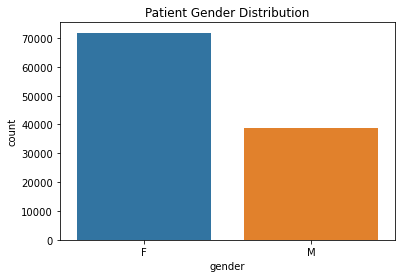

In [23]:
# 7. Gender distribution
sns.countplot(x="gender", data=df)
plt.title("Patient Gender Distribution")
plt.show()

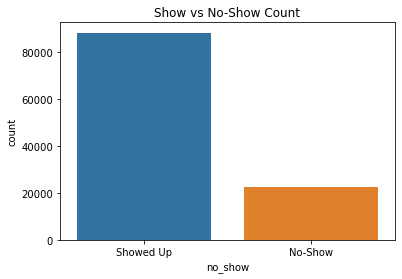

In [24]:
# 8. Show vs No-show
sns.countplot(x="no_show", data=df)
plt.title("Show vs No-Show Count")
plt.xticks([0, 1], ["Showed Up", "No-Show"])
plt.show()

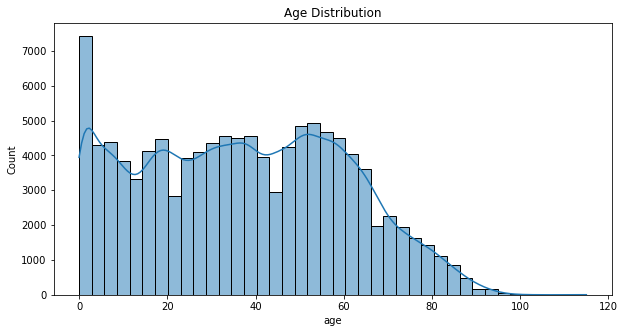

In [25]:
# 9. Age distribution
plt.figure(figsize=(10, 5))
sns.histplot(df["age"], bins=40, kde=True)
plt.title("Age Distribution")
plt.show()

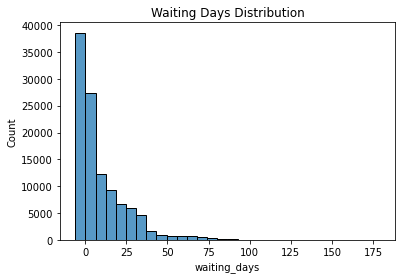

In [26]:
# 10. Waiting days distribution
sns.histplot(df["waiting_days"], bins=30)
plt.title("Waiting Days Distribution")
plt.show()

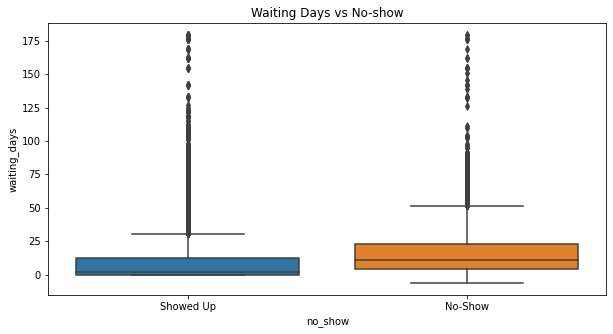

In [27]:
# 11. Impact of waiting days on no-shows
plt.figure(figsize=(10, 5))
sns.boxplot(x="no_show", y="waiting_days", data=df)
plt.title("Waiting Days vs No-show")
plt.xticks([0, 1], ["Showed Up", "No-Show"])
plt.show()

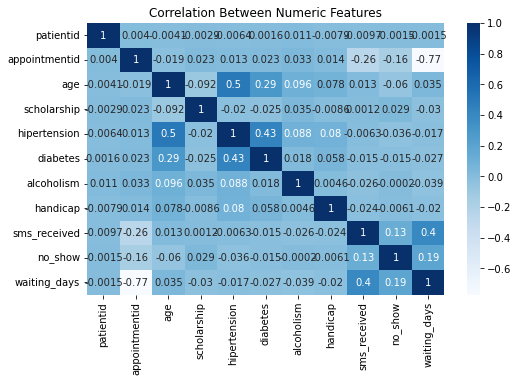

In [29]:
# 13. Correlation Heatmap
plt.figure(figsize=(8, 5))
# Use numeric-only selection for compatibility with older pandas versions
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap="Blues")
plt.title("Correlation Between Numeric Features")
plt.show()

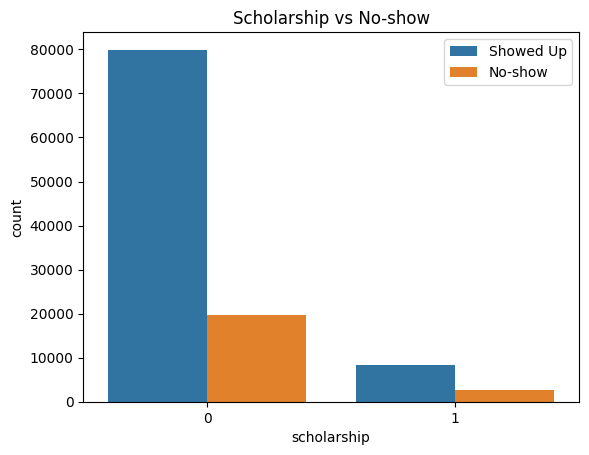

In [ ]:
# 14. Distribution by Scholarship
sns.countplot(x="scholarship", hue="no_show", data=df)
plt.title("Scholarship vs No-show")
plt.legend(["Showed Up", "No-show"])
plt.show()

In [ ]:
#  --- Data Preprocessing Summary ---

print("\n✅ Final dataset shape:", df.shape)
print("✅ Columns ready for modeling:\n", df.columns.tolist())
print("✅ Target column: no_show (0 = came, 1 = missed)")


✅ Final dataset shape: (110526, 15)
✅ Columns ready for modeling:
 ['patientid', 'appointmentid', 'gender', 'scheduledday', 'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received', 'no_show', 'waiting_days']
✅ Target column: no_show (0 = came, 1 = missed)
